In [1]:
import os
import json

import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from meld_classifier.meld_cohort import MeldCohort, MeldSubject
from meld_classifier.evaluation import Evaluator
from meld_classifier.experiment import Experiment

import h5py
def load_prediction(subject,hdf5):
    results={}
    with h5py.File(hdf5, "r") as f:
        for hemi in ['lh','rh']:
            results[hemi] = f[subject][hemi]['prediction'][:]
    return results

Setting MELD_DATA_PATH to /home/kw350/rds/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /home/kw350/rds/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/user/kw350/rds-kw350-meld/experiments/kw350/
Setting FS_SUBJECTS_PATH to /home/kw350/rds/rds-kw350-meld/meld_data/Data/output/fs_outputs


In [2]:
site_codes=['H2', 'H3','H4','H5','H6','H7','H9','H10','H11','H12','H14','H15','H16','H17','H18','H19',
                  'H21','H23','H24','H26']
c= MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix_combat_6.hdf5',            
              dataset='MELD_dataset_V6.csv')

data_parameters = json.load(open(os.path.join('/rds/project/kw350/rds-kw350-meld',
                                              'experiments/co-ripa1/iteration_21-09-15',
                                              'ensemble_21-09-15/fold_all/',
                                              'data_parameters_{}.json'.format('ensemble_iteration'))))
network_parameters = json.load(open(os.path.join('/rds/project/kw350/rds-kw350-meld',
                                              'experiments/co-ripa1/iteration_21-09-15',
                                              'ensemble_21-09-15/fold_all/',
                                              'network_parameters_{}.json'.format('ensemble_iteration'))))
data_parameters['min_area_threshold']=0


In [69]:
folder1='/rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/iteration_21-09-15/ensemble_21-09-15/fold_all/'
hdf_predictions = os.path.join(folder1,'results','predictions_ensemble_iteration_train.hdf5')
checkpoint_path=os.path.join(folder1,"models")

In [140]:
exp = Experiment(folder1, 'ensemble_iteration')
exp.data_parameters['min_area_threshold']=10
eva = Evaluator(exp)
#set area threshold to 0
eva.min_area_threshold=10

In [141]:
combined_ids = np.hstack([data_parameters['train_ids'],data_parameters['val_ids']])


In [175]:
#load/predict
tps=[]
fps=[]
boundary_full = np.zeros_like(c.cortex_mask,dtype=float)
for sub in combined_ids:
    print(sub)
    subj = MeldSubject(sub,cohort=c)
    hemi=subj.get_lesion_hemisphere()
    boundary_zones=subj.load_boundary_zone(max_distance=None)<20
    if hemi=='lh':
        boundary = boundary_zones[:len(boundary_zones)//2]
    else:
        boundary = boundary_zones[len(boundary_zones)//2:]
    boundary_full[c.cortex_mask]=boundary
#     try:
#         pred=load_prediction(combined_ids[-,hdf_predictions)
#     except KeyError: 
    eva.load_predict_single_subject(sub,suffix="_train")
    pred=load_prediction(sub,hdf_predictions)
    tp=[]
    if hemi is not None:
        tp=np.unique(pred[hemi])
       
        tp=tp[tp>0]
        for tp_cluster in tp:
            tps.append(np.sum(pred[hemi]==tp_cluster))
    for hemi in ['lh','rh']:
        fp = np.unique(pred[hemi])
        fp=fp[fp>0]
        fp = np.setdiff1d(fp,tp)
        for fp_cluster in fp:
            fps.append(np.sum(pred[hemi]==fp_cluster))
    
    

MELD_H17_3T_FCD_0035
MELD_H21_15T_FCD_0039
MELD_H2_3T_C_0024
MELD_H19_3T_C_027
MELD_H15_3T_C_0028
MELD_H23_15T_FCD_0007
MELD_H2_3T_C_0015
MELD_H10_3T_C_0010
MELD_H19_3T_C_022
MELD_H14_3T_FCD_0019
MELD_H15_3T_C_0014
MELD_H14_3T_FCD_0036
MELD_H12_3T_C_0043
MELD_H19_3T_C_012
MELD_H4_15T_C_0003
MELD_H3_3T_C_0030
MELD_H14_3T_C_0008
MELD_H9_3T_FCD_0011
MELD_H19_3T_FCD_001
MELD_H3_3T_C_0014
MELD2_H7_3T_FCD_006
MELD_H10_3T_C_0007
MELD_H19_3T_C_023
MELD_H2_15T_FCD_0024
MELD_H10_3T_FCD_0001
MELD_H17_3T_FCD_0016
MELD_H4_15T_C_0006
MELD_H3_3T_C_0094
MELD_H14_3T_C_0011
MELD_H2_15T_FCD_0025
MELD_H15_3T_C_0004
MELD_H14_3T_FCD_0008
MELD_H24_3T_FCD_0019
MELD_H4_3T_FCD_0006
MELD_H21_3T_FCD_0029
MELD_H4_15T_C_0027
MELD_H4_3T_FCD_0024
MELD_H3_3T_C_0008
MELD_H6_3T_FCD_0010
MELD_H11_3T_FCD_0023
MELD_H4_3T_FCD_0014
MELD_H21_3T_FCD_0010
MELD_H12_3T_C_0017
MELD_H18_3T_FCD_0100
MELD_H3_3T_C_0052
MELD_H2_15T_FCD_0019
MELD_H21_3T_FCD_0027
MELD_H17_3T_FCD_0055
MELD_H3_3T_C_0087
MELD_H3_3T_C_0037
MELD_H17_3T_FCD_00

MELD_H17_3T_FCD_0092
MELD_H5_3T_C_0005
MELD_H2_15T_C_0002
MELD_H4_15T_FCD_0005
MELD_H4_3T_FCD_0008
MELD_H16_3T_FCD_042
MELD_H26_15T_FCD_0006
MELD_H4_3T_FCD_0041
MELD_H17_3T_FCD_0069
MELD_H14_3T_FCD_0028
MELD_H3_3T_C_0029
MELD_H3_3T_C_0025
MELD_H17_3T_FCD_0129
MELD_H21_3T_FCD_0022
MELD_H15_3T_C_0017
MELD_H4_15T_FCD_0022
MELD_H24_3T_FCD_0009
MELD_H12_3T_FCD_0029
MELD_H3_3T_C_0022
MELD_H10_3T_FCD_0006
MELD_H17_3T_FCD_0037
MELD_H3_3T_C_0027
MELD_H5_3T_FCD_0016
MELD_H17_3T_FCD_0063
MELD_H5_3T_FCD_0023
MELD_H11_3T_FCD_0026
MELD_H17_3T_FCD_0118
MELD_H2_3T_FCD_0002
MELD_H4_15T_C_0028
MELD_H14_3T_FCD_0006
MELD_H12_3T_FCD_0019
MELD_H14_3T_FCD_0005
MELD_H2_15T_FCD_0002
MELD_H21_3T_FCD_0020
MELD_H24_3T_FCD_0027
MELD_H19_3T_C_010
MELD_H10_3T_C_0004
MELD_H3_3T_C_0064
MELD_H17_3T_FCD_0123
MELD_H21_3T_FCD_0045
MELD_H3_3T_C_0002
MELD_H17_3T_FCD_0109
MELD_H15_3T_C_0021
MELD_H11_3T_FCD_0038
MELD_H17_3T_FCD_0059


In [176]:
# np.save('../cluster_data/tps.npy',tps)
# np.save('../cluster_data/fps.npy',fps)

In [5]:
tps=np.load('../cluster_data/tps.npy')
fps=np.load('../cluster_data/fps.npy')

In [6]:
from sklearn import metrics
scores = np.hstack([tps,fps])
y = np.hstack([np.ones_like(tps),np.zeros_like(fps)])
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)

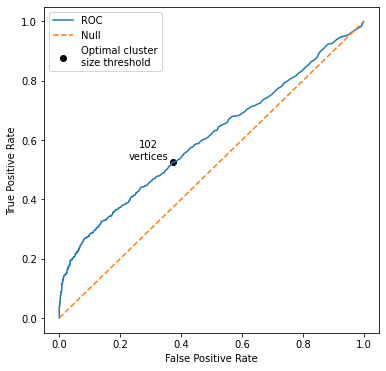

In [17]:
fig,axes = plt.subplots(1,1, figsize=(6,6))

axes.plot(fpr,tpr,label='ROC')
axes.plot([0,1], [0,1], linestyle='--', label='Null')
axes.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Optimal cluster\nsize threshold')
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
axes.text(fpr[ix]-0.08, tpr[ix]+0.01,f'{thresholds[ix]}\nvertices',ha='center')
axes.legend()


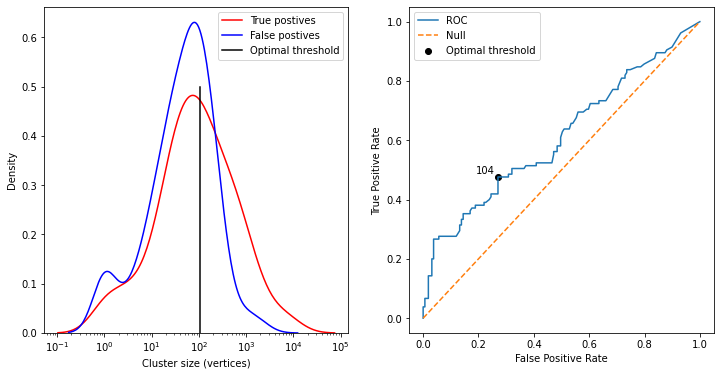

In [171]:
fig,axes = plt.subplots(1,2, figsize=(12,6))
sns.kdeplot(tps,ax=axes[0],color='r',label='True postives',log_scale=True)
sns.kdeplot(fps,ax=axes[0],color='b',label='False postives',log_scale=True)
axes[0].plot([thresholds[ix],thresholds[ix]],[0,0.5],c='k',label='Optimal threshold')
axes[0].legend()
axes[0].set_xlabel('Cluster size (vertices)')

axes[1].plot(fpr,tpr,label='ROC')
axes[1].plot([0,1], [0,1], linestyle='--', label='Null')
axes[1].scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Optimal threshold')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].text(fpr[ix]-0.01, tpr[ix]+0.01,thresholds[ix],ha='right')
axes[1].legend()